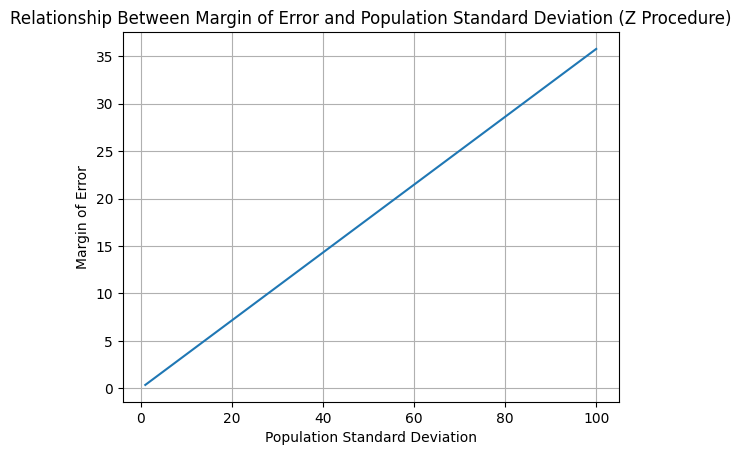

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of population standard deviations
population_std_devs = np.arange(1, 101)

# Calculate the margin of error for each population standard deviation
margin_of_errors = critical_value * (population_std_devs / np.sqrt(sample_size))

# Plot the relationship
plt.plot(population_std_devs, margin_of_errors)
plt.xlabel("Population Standard Deviation")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Population Standard Deviation (Z Procedure)")
plt.grid(True)
plt.show()

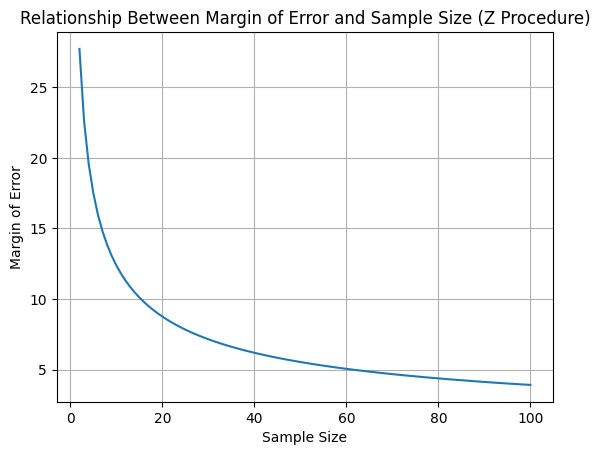

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
population_std_dev = 20
confidence_level = 95

# Calculate the critical value for the Z-score
critical_value = stats.norm.ppf((1 + confidence_level / 100) / 2)

# Generate an array of sample sizes
sample_sizes = np.arange(2, 101)

# Calculate the margin of error for each sample size
margin_of_errors = critical_value * (population_std_dev / np.sqrt(sample_sizes))

# Plot the relationship
plt.plot(sample_sizes, margin_of_errors)
plt.xlabel("Sample Size")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Sample Size (Z Procedure)")
plt.grid(True)
plt.show()

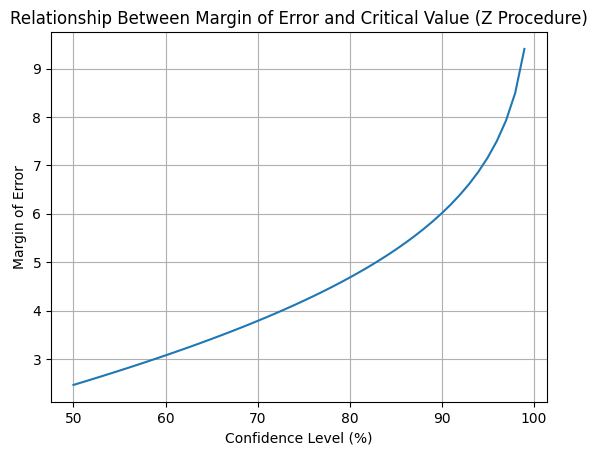

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set parameters
sample_size = 30
population_std_dev = 20

# Generate an array of confidence levels from 50% to 99%
confidence_levels = np.arange(50, 100)

# Calculate the critical values (Z-scores) for each confidence level
critical_values = stats.norm.ppf((1 + confidence_levels / 100) / 2)

# Calculate the margin of error for each critical value
margin_of_errors = critical_values * (population_std_dev / np.sqrt(sample_size))

# Plot the relationship
plt.plot(confidence_levels, margin_of_errors)
plt.xlabel("Confidence Level (%)")
plt.ylabel("Margin of Error")
plt.title("Relationship Between Margin of Error and Critical Value (Z Procedure)")
plt.grid(True)
plt.show()

In [4]:
#applying t procedure

In [6]:
import pandas as pd
import numpy as np

test_df=pd.read_csv('test_titanic.csv')
train_df=pd.read_csv('train_titanic.csv')

#now we combine both of them to get total population and then
#apply CLt to see the dissrence with actual population results

df=pd.concat([train_df.drop(columns=['Survived']),test_df]).sample(1309) #doing shuffling by sample

df.shape

(1309, 11)

<Axes: ylabel='Density'>

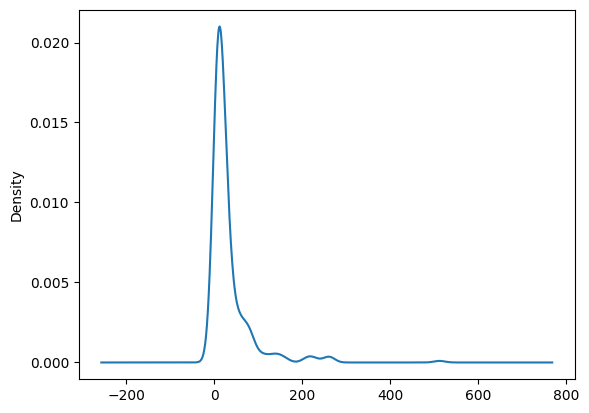

In [7]:
df['Fare'].plot(kind='kde')

In [8]:
#sample size=30 and no. of times 100
samples=[]
means=[]
stds=[]
for i in range(100):
  x=df['Fare'].dropna().sample(30).values
  stds.append(x.std())
  means.append(x.mean())

In [9]:
#this is our s
sample_std=np.mean(stds)
sample_std

43.931073783777165

<Axes: ylabel='Density'>

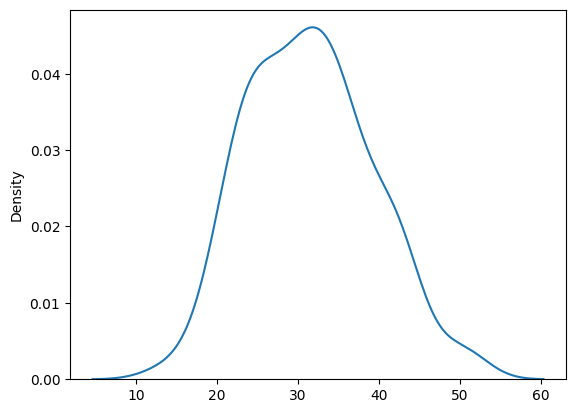

In [11]:
import seaborn as sns
sns.kdeplot(means)

<Axes: ylabel='Density'>

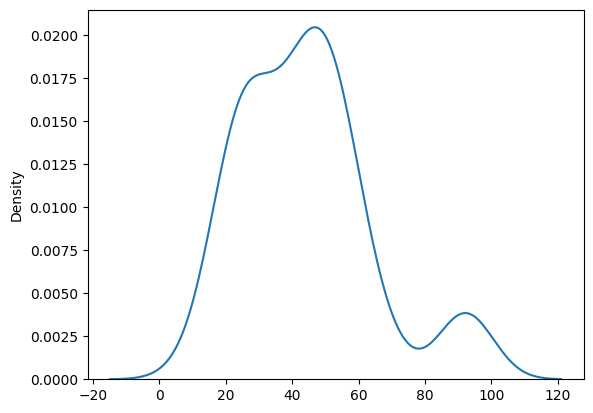

In [12]:
sns.kdeplot(stds)

In [14]:

#now calc t(alpha/2) bt t table thta comes 2.042 for 95%
lower_limit=np.mean(means)-2.042*(sample_std/np.sqrt(30))
upper_limit=np.mean(means)+2.042*(sample_std/np.sqrt(30))

In [15]:
print(f'range is {lower_limit} to {upper_limit}')

range is 15.101050280919097 to 47.857507519080905


In [17]:
#now calc t(alpha/2) bt t table thta comes 0.683 for 50%
lower_limit=np.mean(means)-0.683*(sample_std/np.sqrt(30))
upper_limit=np.mean(means).mean()+0.683*(sample_std/np.sqrt(30))

In [18]:
print(f'range is {lower_limit} to {upper_limit}')

range is 26.001154440238857 to 36.957403359761145


In [19]:
print(f'actual population mean {df["Fare"].dropna().mean()}')

actual population mean 33.295479281345564
